# H2Flows Capstone Design: Sedimentation Tank Channel

## H2Flows members:  Mehrin Selimgir, Linping Xu, Shuo Han



## Introduction

In this design, our goal is to create a four channel design algorithms for AguaClara sedimentation tank in Python.
 
An AguaClara channel design algorithm has already been created on MathCAD. Thus, the primary basis of our design approach is based on this original MathCAD code as well as coding tools in aide_design package. For the benefit of future design work of AguaClara team, this project is to create a model that could quickly respond to the change of design parameters like flow rate, the size of the sedimentation tanks and filter tanks etc, but also could guarantee the treatment performance at the same time.

The following image is the planview of the sedimentation tank and its inlet and out channels:


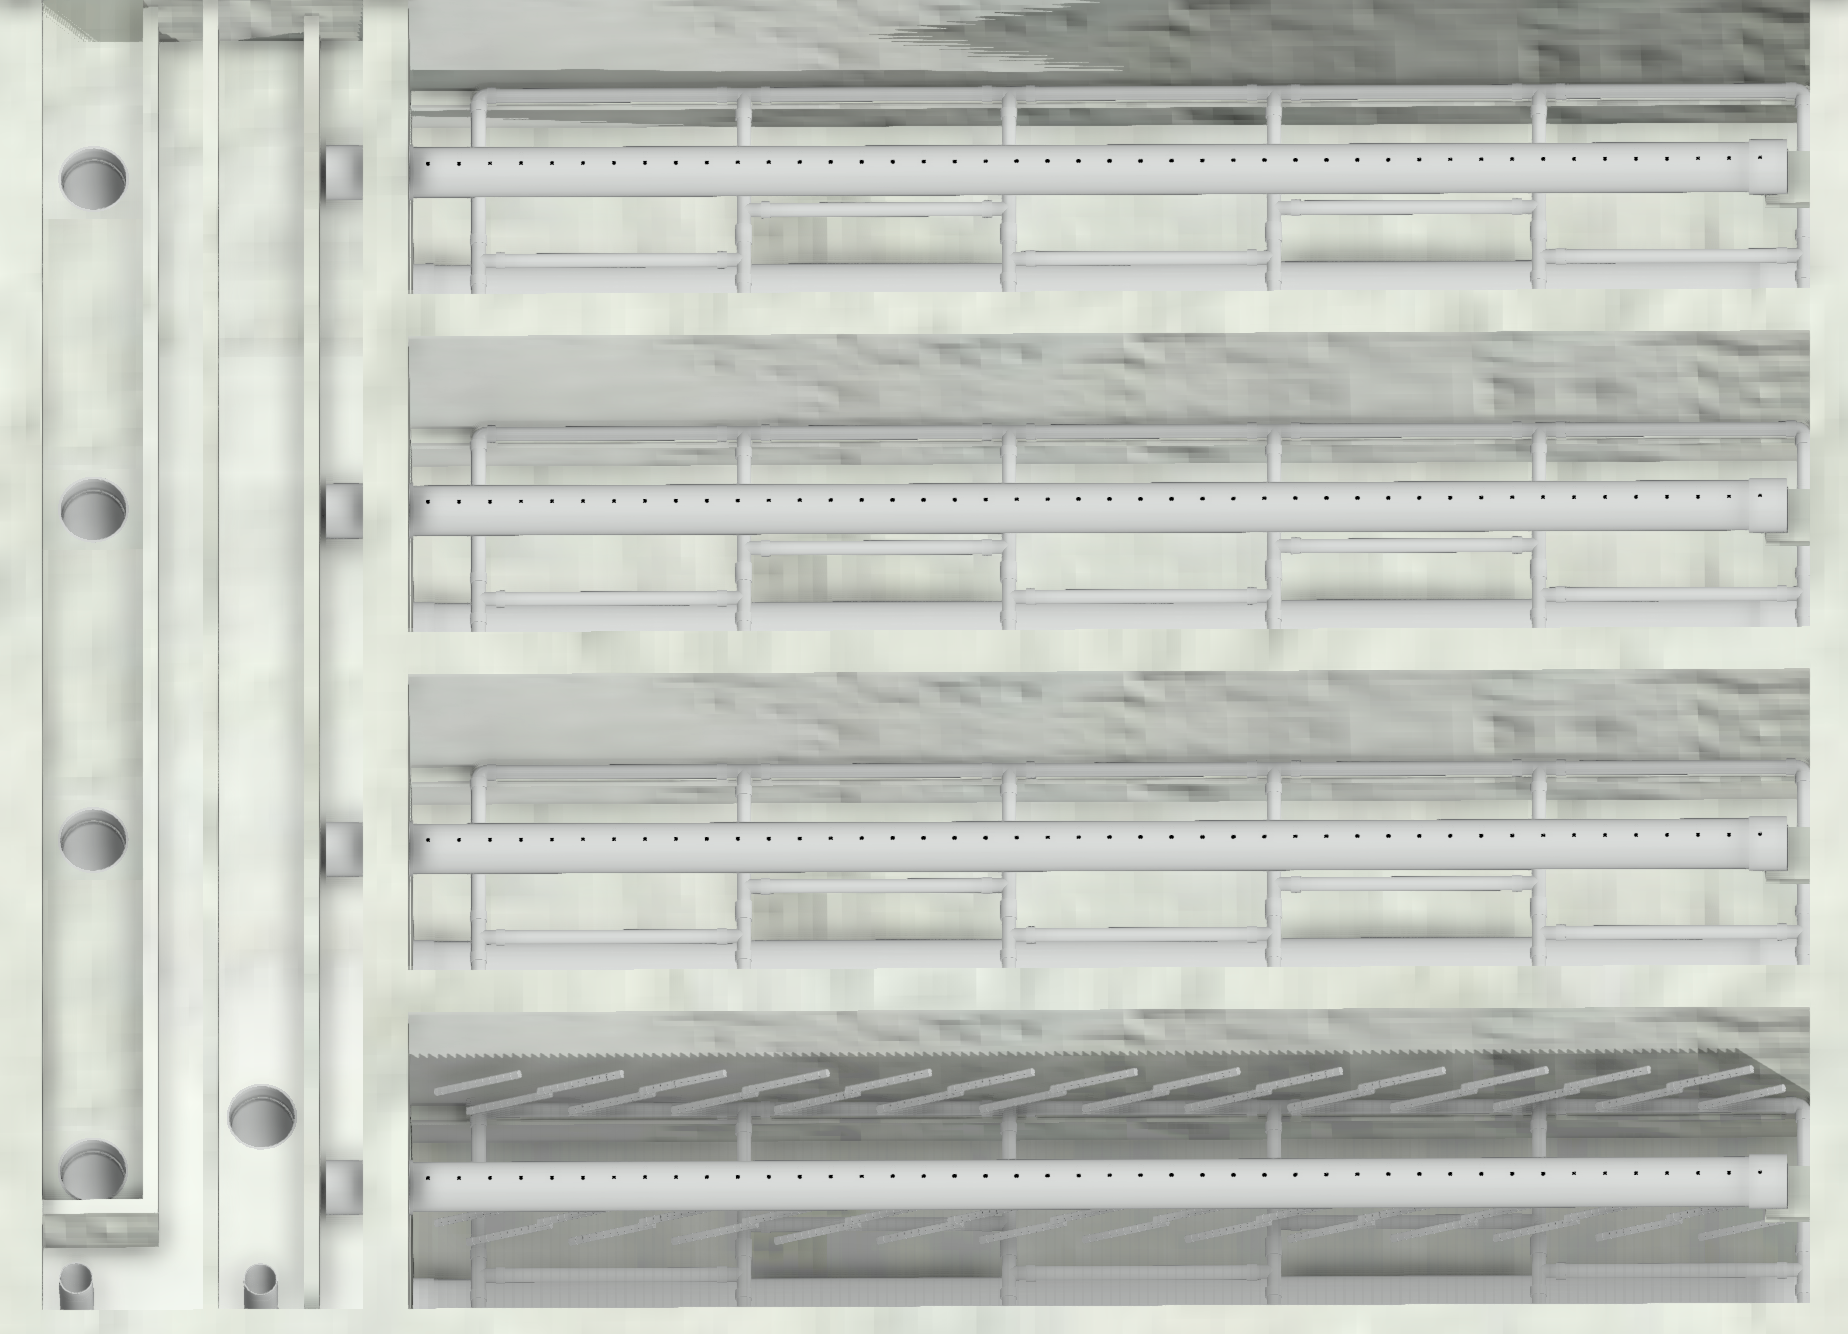

<center>Figure 1. Sedimentation tank overview</center>



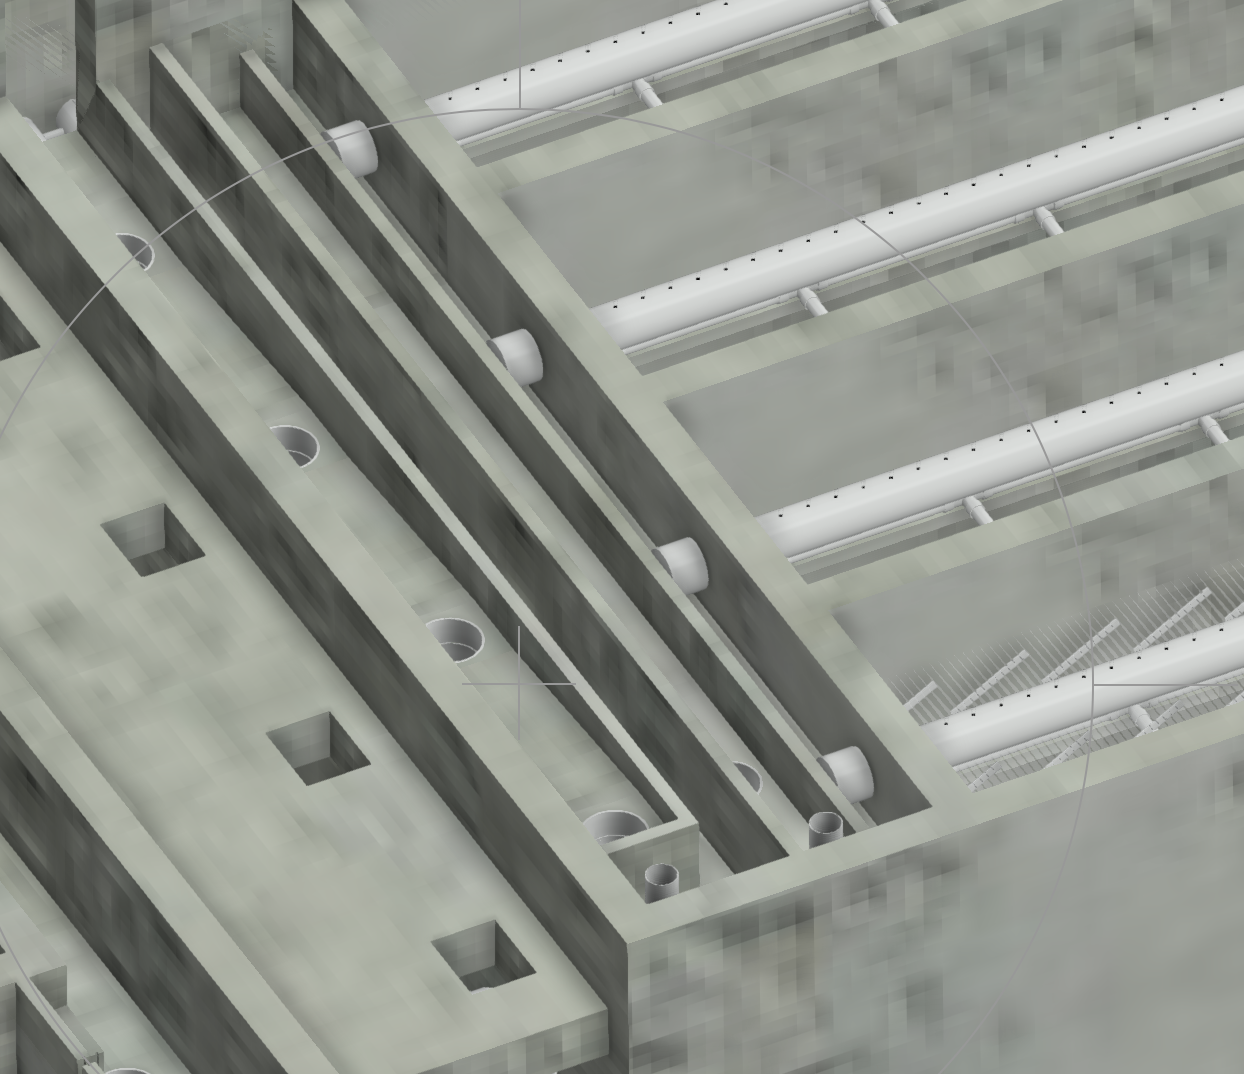
                                      
<center>Figure 2. Channels</center>



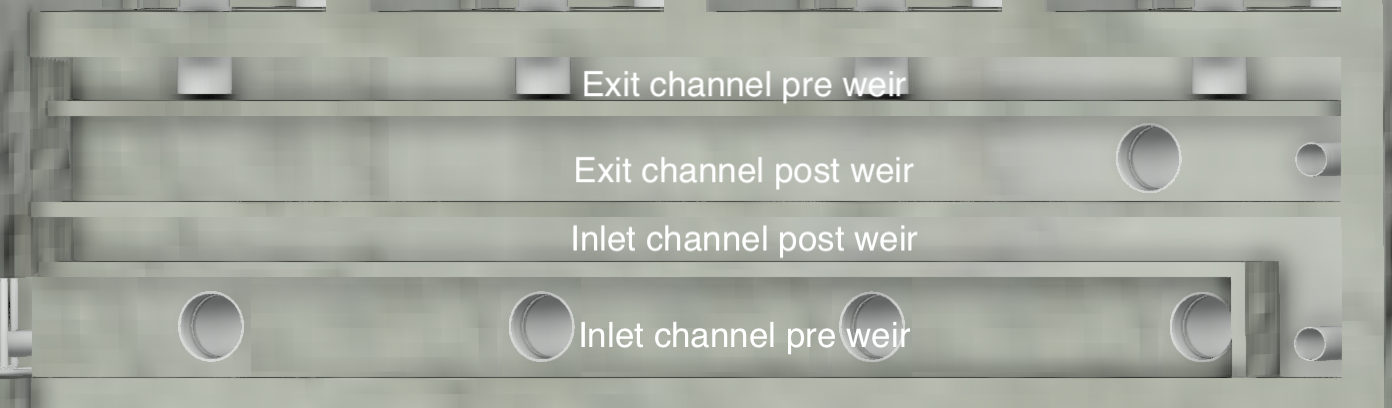

<center>Figure 3. Channels Naming</center>




Figure 3 elucidates the four channels we are designing in our project. The effluent from flocculation tank comes in from the left side of inlet channel pre weir, and goes into the manifolds through the pipe shown in Figure 3. Inlet channel post weir is used to drain the poorly flocculated water when flocculation is not performing well. Exit channel pre weir is to collect the clean water from the exit launder, and effluent water overflow into post weir to get collected.






## Design Constraints:
* Varying Flow rates [6,60] L/s

* Velocity constraints for inlet channel:
    - Ensure flocs don’t drop (0.15m/s), this would be our lower bound of velocity design, Vmin
    - Distribute the water uniformly - This would be our higher bound of velocity design, Vmax



## Governing Constraints of the Four Channels
* The width of the inlet channel pre weir is constrained by the maximum inlet channel headloss and flow condition.
* The width of the inlet channel post weir is constrained by the headloss (Pressure Recovery) and the minimum channel width that is predefined(15cm).
* The width of the exit channel pre weir is constrained by the minimum channel width that is predefined (15 cm).
* The width of the exit channel post weir is constrained by the headloss and the minimum width that is predefined (15 cm).

## Design Algorithm
###### Below is a general outline of our design procedure for the four channels. 
###### More detailed, step-by-step explanation, as well as the equations  for our calculations/process are embedded in our code.


### Steps for Inlet Channel 
1. Start with expert inputs of sedimentation tanks, width of sedimentation tank, thickness of sedimentation wall, and thickness of dividing wall to calculate the length of the 4 sedimentation channels. 
2. Calculate headloss of inlet channel pre weir.
3. Calculate the width of the inlet channel pre weir
4. Calculate height of water inlet channel and adding freeboard height 
5. Calculate the width of the inlet channel post weir
6. Calculate the velocity of the inlet channel
7. Select drain pipe
8. Calculate the width of the drain box 


### Steps for Exit Channel 
1. Calculate the height of the exit channel 
2. Calculate the water level in exit channel and the exit weir
3. Calculate the width of the exit channel pre weir 
4. Calculate the width of the exit channel post weir 
5. Calculate the total width of the exit channel 
6. Calculate the width of the exit channel drain box 


In [1]:
from aide_design import floc_model as floc
from aide_design.play import*
from aide_design import floc_model as floc
from pytexit import py2tex

#Below are the items that were imported by the code above so that you know what abbreviations to use in your code.

# Third-party imports
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib

# AIDE imports
#import aide_design
#import aide_design.pipedatabase as pipe
#from aide_design.units import unit_registry as u
#from aide_design import physchem as pc
#import aide_design.expert_inputs as exp
#import aide_design.materials_database as mat
#import aide_design.utility as ut
#import aide_design.k_value_of_reductions_utility as k
#import aide_design.pipeline_utility as pipeline
#import warnings

## Design Input Variables


In [24]:
# Number of sedimentation tanks 
N_SedTanks=4

# Width of Sedimentation Tank 
W_Sed= 42*u.inch

# Thickness of Sedimentation Wall 
T_SedWall= 15*u.cm

# Thickness of Sedimentation Dividing Wall 
T_SedDividingWall= 15*(u.cm)

# Q_Plant=flowrate coming out of the sedimentation tank = influent flow rate 
Q_Plant=24*( u.L/u.s)

# The ratio of the height to the width
Pi_QSedTanks=0.95

# The headloss for which the launders were designed to ensure uniform flow between sed tanks
HL_SedLaunderBod=4*u.cm

# Headloss for which the diffusers were designed to ensure uniform flow between sed tanks 
HL_SedDiffuser=0.001*u.m

# A dimensionaless constant value for the sed diffusers? 
SedDiffuser=0.2

# Nominal diameter of the Sedimentation tank Manifold 
ND_SedManifold = 1* u.inch

# Minimum spacing between the outside of a pipe coupling that is embedded in concrete and the 
#nearest wall or weir.
S_Fitting=5*u.cm

# Max Height of water in sedimentation inlet channel 
# Relaxed from 35cm to 50cm
HW_SedInletChannelMax=50*u.cm

T_design = 20*u.degC

# Friction coefficient of concrete
E_Concrete = 0.01*u.m

# Nominal diameter of sed launder
ND_SedLaunder = 1*u.inch

# The height of the plant free board
H_PlantFreeboard = 0.1*u.m

# The height of the weir in the inlet channel
H_SedWeirInlet=52*u.cm

# The height of the free board of the exit channel 
HL_SedWeirFreeboard=5*u.cm

# The narrowest channel that a mason can construct if the channel is not deeper than 
# about 50 cm
# We assume here that the depth of channels would not exceed 50 cm, the result should be 
# examined later
W_ChannelMin=15*u.cm

# The nominal diameter of the pipe from sed tank to filter
ND_SedToFiPipe=1/4*u.inch

# The thickness of sed tank weir
T_SedWeir=8*u.cm

SDR=26

HW_SedEst=2*u.m

# The height of the exit channel free board
H_SedExitFree=5*u.cm
#minor loss coefficients
K_PipeEnt=0.5
K_E190=0.9
K_PipeExit=1


K=0

# Boolean type variables to determine whether the channel is an open channel
openchannel=True
closedchannel=False

## Conclusion
We want to look into how the total width of the four channels will change when increasing the flow rate, our goal is to evaluate the effect of future flow rate increase on current drinking water design. In real engineering design, especially for the global South, it is critical to take cost into consideration. Ideally our design should be able to handle future flow rate as high as 60 L/s, but if the construction cost is too high, the design might not be feasible for local people. We assume that the cost of construction is proportional to the total width, and the results of our codes from different flow rate are as follows:

( Following results are based on assumption of legitimate number of sedimentation tanks with other input variables remain all the same.)

| Flow Rate (L/s) | Number of Sed Tanks | Total Width (cm)   |
|:---------------:|:-------------------:|:------------------:|
|   24  | 4| 92.77|
|   36  | 6| 109.3|
|   60  | 6| 128.3|

The numbers above provide a rough idea about the scale of increase in total width, apparently, it doesn't go proportionally with the increase in flow rate. Thus, our suggestion for design team is that, it is feasible to appropriately increase the total width within the financial ability to accommodate future demand. However, more accurate calculation should be done using different sets of real expert inputs.



# Step 1: Design of Inlet Channel

## 1.1 The length of the sedimentation tank channel


In [25]:
L_SedChannel=N_SedTanks*W_Sed+T_SedWall+(N_SedTanks-1)*T_SedDividingWall
py2tex('L_SedChannel=N_SedTanks*W_Sed+T_SedWall+(N_SedTanks-1)*T_SedDividingWall')
print('The length of the sedimentation tank channel is ',L_SedChannel.to(u.m))

<IPython.core.display.Latex object>

$$L_{SedChannel}=N_{SedTanks}\,W_{Sed}+T_{SedWall}+\left(N_{SedTanks}-1\right)\,T_{SedDividingWall}$$
The length of the sedimentation tank channel is  4.867 meter


## 1.2 The headloss of exit channel pre weir


In [26]:
# Headloss of the sedimentation tank weir exit
# Old MathCAD code: HL_SedWeirExit=Headloss_weir(Q_Train,L_SedChannel)
# This function is defined in physchem functions as "pc.headloss_weir"
HL_SedWeirExit=pc.headloss_weir(Q_Plant, L_SedChannel)
print('The headloss of the exit channel pre weir is ',HL_SedWeirExit.to(u.cm))

The headloss of the exit channel pre weir is  1.936 centimeter


## 1.3 The maximum headloss of the inlet channels


In [27]:
# The maximum headloss of the inlet channel
HL_SedInletChannelMax=(HL_SedLaunderBod+HL_SedDiffuser)*(1-Pi_QSedTanks**2)
py2tex('HL_SedInletChannelMax=(HL_SedLaunderBod+HL_SedDiffuser)*(1-Pi_QSedTanks**2)')
print('The maximum headloss of the inlet channel is ',HL_SedInletChannelMax)

<IPython.core.display.Latex object>

$$HL_{SedInletChannelMax}=\left(HL_{SedLaunderBod}+HL_{SedDiffuser}\right)\,\left(1-\Pi_{QSedTanks}^{2}\right)$$
The maximum headloss of the inlet channel is  0.3998 centimeter


## 1.4 The minimum width of inlet channel pre weir via plumbing 


In [28]:
# Width of the Inlet Channel Sedimentation Tank Weir calculated based on "plumbing"- 
# Minimum value of the width of the Weir so that the manifold may fit in
# Note variable name change here
Min_W_SedInletChannelWeir= pipe.OD(ND_SedManifold)+2*S_Fitting

print('The minimum width of the inlet channel pre weir via plumbing is ',Min_W_SedInletChannelWeir.to(u.cm))


The minimum width of the inlet channel pre weir via plumbing is  13.34 centimeter


## 1.5 The minimum width of the inlet channel pre weir via headloss


The original MathCAD equation for calculating the width of the weir for inlet channel calculated using headloss is as follow:

**W_SedInletChannelPreWeirMinHL = W_HorizChannel(Q_Plant, HW_SedInletChannelMax, HL_SedInletChannelMax, L_SedChannel,Nu_Water, E_concrete,0 ,0)**

Here in this funtction, we compare the maximum head loss in inlet channel (HL_SedInletChannelMax) and 1/3 height of water in inlet channel (1/3 HW_SedInletChannelMax) and take the smaller value as the headloss for calculation of the channel width. 1/3 HW_SedInletChannelMax is derived from the calculation of critical flow, using Froude number, we get to the conclusion that ciritical depth y = 2/3 HW_SedInletChannelMax, which means delta H = 1/3 HW_SedInletChannelMax. Such constraint is aiming at making sure the flow in inlet channel is stable.

The next step is to use loop to find the right answer for channel width. The equation is showed below.

In [29]:
def W_HorizChannel(Q_Plant,HW_SedInletChannelMax,HL_SedInletChannelMax,L_SedChannel,Nu_Water, E_concrete,manifold,K):
    # Delta H
    HL_Local=min(HL_SedInletChannelMax,1/3*HW_SedInletChannelMax)
    W_new=Q_Plant/((HW_SedInletChannelMax-HL_Local)*np.sqrt(2*pc.gravity*HL_Local))
    error=1
    i=0
    while error>0.0001 and i<20:
        W=W_new
        i=i+1
        term1=pc.fric_rect(Q_Plant, W, HW_SedInletChannelMax-HL_Local,Nu_Water, E_concrete, openchannel)
        term2=L_SedChannel/(4*pc.radius_hydraulic(W,HW_SedInletChannelMax-HL_Local,openchannel))*(1-2*manifold/3)
        term3=2*pc.gravity*HL_Local
        term4=Q_Plant/(HW_SedInletChannelMax-HL_Local)
        W_new=np.sqrt((1+K+term1*term2)/term3)*term4
        error=np.abs(W_new-W)/(W_new-W)
    return W_new
py2tex('W = Q/(H-DeltaH)- sqrt((1+f*(L/4*R_h))/2*g*(DeltaH))')


# Minimum width calculated based on headloss
Nu_Water = pc.viscosity_kinematic(T_design)
Min_W_SedInletChannelPreWeirHL = (W_HorizChannel(Q_Plant,HW_SedInletChannelMax,HL_SedInletChannelMax,L_SedChannel,Nu_Water, E_Concrete,0,0)).to(u.inch)

print('The minimum widthof the inlet channel pre weir via headloss is ',Min_W_SedInletChannelPreWeirHL.to(u.cm))




<IPython.core.display.Latex object>

$$W=\frac{Q}{H-\Delta H}-\sqrt{\frac{1+f\,\frac{L}{4}\,R_{h}}{2}\,g\,\Delta H}$$
The minimum widthof the inlet channel pre weir via headloss is  22.34 centimeter


## 1.6 The width of the inlet channel pre weir

In [30]:
#Now taking the maximum value of the width

W_SedInletChannelPreWeir = max(Min_W_SedInletChannelWeir, Min_W_SedInletChannelPreWeirHL)
print('The width of the inlet channel pre weir is ',W_SedInletChannelPreWeir.to(u.cm))

The width of the inlet channel pre weir is  22.34 centimeter


## 1.7 The height of the water via plumbing

In [31]:
#Now calculating the height of the water in sedimentation tank inlet using pipe ID
HW_SedInlet_ChannelMinPlumbing= HL_SedLaunderBod + HL_SedDiffuser + pipe.OD(ND_SedLaunder) + S_Fitting +HL_SedWeirExit
print('The height of the water via plumbing is ',HW_SedInlet_ChannelMinPlumbing)

The height of the water via plumbing is  14.38 centimeter


## 1.8 The height of the water via headloss


In [32]:
#Now calculating the height of the water in sed tank inlet using headloss 
def H_HorizChannel(Q_Plant, W_SedInletChannelPreWeir,HL_SedInletChannel,L_SedChannel,Nu_Water,E_Concrete,manifold):
    H_new=Q_Plant/(W_SedInletChannelPreWeir*np.sqrt(2*pc.gravity*HL_SedInletChannel))+HL_SedInletChannelMax
    error=1
    i=0
    while error>0.001 and i<200:
        H=H_new
        HL_local=min(HL_SedInletChannelMax,1/3*H_new)
        i=i+1
        term1=Q_Plant/W_SedInletChannelPreWeir
        term2=pc.fric_rect(Q_Plant,W_SedInletChannelPreWeir , H-HL_local,Nu_Water, E_Concrete, openchannel)
        term3=L_SedChannel/(4*pc.radius_hydraulic(W_SedInletChannelPreWeir,H-HL_local,openchannel))*(1-2*manifold/3)
        term4=2*pc.gravity*HL_local
        H_new=term1*np.sqrt((1+term2*term3)/term4)+HL_local
        error=np.abs(H_new-H)/(H_new+H)
    return H_new

HW_SedInletChannel_HL=H_HorizChannel(Q_Plant, W_SedInletChannelPreWeir,HL_SedInletChannelMax,L_SedChannel,Nu_Water,E_Concrete,0).to(u.inch) 
print('The height of water via headloss is ',HW_SedInletChannel_HL.to(u.cm))


The height of water via headloss is  51.02 centimeter


## 1.9 The height of the water

In [33]:
#Now taking the maximum value of the two height of water calcs 
HW_SedInletChannel= max( HW_SedInlet_ChannelMinPlumbing, HW_SedInletChannel_HL) 
print('The height of the water is ',HW_SedInletChannel.to(u.cm))

The height of the water is  51.02 centimeter


## 1.10 The height of the inlet channel

In [34]:
#Now adding in the Height of plant freeboard 
H_SedInletChannel= HW_SedInletChannel + H_PlantFreeboard
py2tex('H_SedInletChannel= HW_SedInletChannel + H_PlantFreeboard')
print('The height of the inlet channel is ',H_SedInletChannel.to(u.cm))

<IPython.core.display.Latex object>

$$H_{SedInletChannel}=HW_{SedInletChannel}+H_{PlantFreeboard}$$
The height of the inlet channel is  61.02 centimeter


## 1.11 The width of the inlet channel post weir

In [35]:
# Finding the width of the post weir inlet channel by finding the maximum
# Assuming the water level drops 1/3 of the height of the weir
# The critical depth is 2/3 of the depth of the channel, allowing the water to drop 1/3.

W_SedInletChannelPostWeir=max(W_ChannelMin,W_HorizChannel(Q_Plant,H_SedWeirInlet, H_SedWeirInlet,L_SedChannel,Nu_Water,E_Concrete,0,0))
print('The width of the inlet channel post weir is ',W_SedInletChannelPostWeir.to(u.cm))

The width of the inlet channel post weir is  15 centimeter


## 1.12 The total width of the inlet channel

In [36]:
#Total width of the inlet channels: summation of the width of inlet channel preweir and width of inlet channel post weir
W_SedInletChannel=W_SedInletChannelPreWeir + T_SedWeir + W_SedInletChannelPostWeir
print('The total width of the inlet channel is',W_SedInletChannel.to(u.cm))

The total width of the inlet channel is 45.34 centimeter


## 1.13 The velocity of water in the inlet channel


In [37]:
#The velocity of water in the inlet channel
V_SedInletChannel= Q_Plant/(W_SedInletChannelPreWeir* HW_SedInletChannel)
py2tex('V_SedInletChannel= Q_Plant/(W_SedInletChannelPreWeir* HW_SedInletChannel)')

if V_SedInletChannel>= 15*u.cm/u.s:
    print('The velocity of the water in the inlet channel is ',V_SedInletChannel.to(u.cm/u.s),'and meets the velocity constraint.')
    
else:
    print('The velocity of the water in the inlet channel is ',V_SedInletChannel.to(u.cm/u.s),'but does not meet the velocity constraint.')
    



<IPython.core.display.Latex object>

$$V_{SedInletChannel}=\frac{Q_{Plant}}{W_{SedInletChannelPreWeir}\,HW_{SedInletChannel}}$$
The velocity of the water in the inlet channel is  21.06 centimeter / second and meets the velocity constraint.


## 1.14 The diameter of drain pipe


In [38]:
# Here we create a function to calculate the nominal diameter
def ND_pipeflow(Q,SDR,HeadLoss,Length,Nu,PipeRough,KMinor):
    i=0
    while Q>pc.flow_pipe(pipe.ID_SDR_all_available(SDR)[i],HeadLoss, Length, Nu, PipeRough, KMinor):
        i=i+1
    return pipe.ND_SDR_available(pipe.ID_SDR_all_available(SDR)[i],SDR)

# The nominal diameter of the sed tank channel drain pipe
ND_SedChannelDrain=ND_pipeflow(Q_Plant,SDR,HW_SedEst,HW_SedEst+W_SedInletChannel,Nu_Water,0,K_PipeEnt+K_PipeExit+K_E190)

#Return the minimum ND that is available
PS_SedChannelDrain=pipe.ND_available(ND_SedChannelDrain)

print('The diameter of the sedimentation drain pipe is ',PS_SedChannelDrain.to(u.inch))


The diameter of the sedimentation drain pipe is  4 inch


## 1.15 The width of the inlet channel drain box

In [39]:
# The width of drain box of the inlet channel
W_SedInletChannelDrainBox=max(2*S_Fitting+pipe.OD(ND_SedChannelDrain),W_SedInletChannelPostWeir)
print('The width of the inlet channel drain box is',W_SedInletChannelDrainBox.to(u.cm))

The width of the inlet channel drain box is 21.43 centimeter


# Step 2: Design of Exit Channel

## 2.1 The height of the exit channel

In [40]:
# The height of sedimentation tank outlet channel equals to the height of the inlet channel
H_SedExitChannel=H_SedInletChannel
py2tex('H_SedExitChannel=H_SedInletChannel')
print('The height of the exit channel is ',H_SedExitChannel.to(u.cm))

<IPython.core.display.Latex object>

$$H_{SedExitChannel}=H_{SedInletChannel}$$
The height of the exit channel is  61.02 centimeter


## 2.2 The water level in exit channel and the exit weir

In [41]:
# The water depth of the sedimentation tank exit channel
HW_SedExitChannel=HW_SedInletChannel-HL_SedLaunderBod-HL_SedDiffuser
py2tex('HW_SedExitChannel=HW_SedInletChannel-HL_SedLaunderBod-HL_SedDiffuser')
print('The height of water in the exit channel is ',HW_SedExitChannel.to(u.cm))

# The water depth of the sedimentation tank exit weir
HW_SedWeirExit=HW_SedExitChannel-HL_SedWeirExit-HL_SedWeirFreeboard
py2tex('HW_SedWeirExit=HW_SedExitChannel-HL_SedWeirExit-HL_SedWeirFreeboard')
print('The height of water of the exit weir is ',HW_SedWeirExit.to(u.cm))

<IPython.core.display.Latex object>

$$HW_{SedExitChannel}=HW_{SedInletChannel}-HL_{SedLaunderBod}-HL_{SedDiffuser}$$
The height of water in the exit channel is  46.92 centimeter


<IPython.core.display.Latex object>

$$HW_{SedWeirExit}=HW_{SedExitChannel}-HL_{SedWeirExit}-HL_{SedWeirFreeboard}$$
The height of water of the exit weir is  39.98 centimeter


## 2.3 The width of the exit channel pre weir

In [42]:
# The width of the exit channel before the weir equals to the minimum width of the exit channel to allow person to cap launder
W_SedExitChannelPreWeir=W_ChannelMin
py2tex('W_SedExitChannelPreWeir=W_ChannelMin')
print('The width of the exit channel pre weir is ',W_SedExitChannelPreWeir.to(u.cm))

<IPython.core.display.Latex object>

$$W_{SedExitChannelPreWeir}=W_{ChannelMin}$$
The width of the exit channel pre weir is  15 centimeter


## 2.4 The width of the exit channel post weir

In [43]:
# The width of the exit channel after the weir 
W_SedExitChannelPostWeir=max(S_Fitting+pipe.OD(ND_SedToFiPipe),S_Fitting+pipe.OD(ND_SedChannelDrain),W_ChannelMin,W_HorizChannel(Q_Plant,HW_SedWeirExit-H_SedExitFree,HW_SedWeirExit,L_SedChannel,Nu_Water,E_Concrete,1,K))
print('The width of the exit channel post weir ',W_SedExitChannelPostWeir.to(u.cm))

The width of the exit channel post weir  16.43 centimeter


## 2.5 The total width of the exit channel

In [44]:
# The width of the exit channel
W_SedExitChannel=W_SedExitChannelPreWeir+T_SedWeir+W_SedExitChannelPostWeir
py2tex('W_SedExitChannel=W_SedExitChannelPreWeir+T_SedWeir+W_SedExitChannelPostWeir')
print('The total width of the exit channel is ',W_SedExitChannel.to(u.cm))

<IPython.core.display.Latex object>

$$W_{SedExitChannel}=W_{SedExitChannelPreWeir}+T_{SedWeir}+W_{SedExitChannelPostWeir}$$
The total width of the exit channel is  39.43 centimeter


## 2.6 The width of the exit channel drain box

In [45]:
# The width of the exit channel drain box
W_SedExitChannelDrainBox=max(S_Fitting+pipe.OD(ND_SedChannelDrain),W_SedExitChannelPostWeir)
print('The width of the exit channel drain box is ',W_SedExitChannelDrainBox.to(u.cm))

The width of the exit channel drain box is  16.43 centimeter


## 3.0 References 

* MathCAD Sedimentation Tank Design Code 
* Monroe Weber-Shirk. Open Channel Flow Notes. 